# Các phương pháp giải bài toán điều kiện đầu 

Khi giải phương trình vi phân 

$$ \frac{du}{dt} = f(u,t) $$

cho trước các điều kiện đầu $u = u_0$ tại $t_0$, ta đã dùng phương pháp Euler nhưng phải chọn bước thời gian rất nhỏ. 

Phương pháp Euler lấy độ dốc tại điểm hiện tại để tính cho điểm sắp tới: 

$u^{n+1} = u^n + \Delta t f(u^{n}, t^{n})$ trong đó f(...) là độ dốc. f được tính tại "n" vì thế nói là độ dốc tại điểm hiện tại.

Có những cách khác có thể cho độ chính xác tốt hơn phương pháp Euler với cùng bước tính Δt:

* phương pháp Euler lùi: lấy độ dốc tại điểm sắp tính thay vì độ dốc hiện tại 
  
  $u^{n+1} = u^n + \Delta t f(u^{n+1}, t^{n+1})$
  
* phương pháp hình thang (Heun): lấy độ dốc là trung bình cộng của độ dốc hiện tại và độ dốc mới  

  $u^{n+1} = u^n + \Delta t \frac{ f(u^{n}, t^{n}) + f(u^{n+1}, t^{n+1}) } {2} $
  
* phương pháp trung điểm: lấy độ dốc tại điểm t + ½Δt

  $u^{n+1} = u^n + \Delta t + f(u^{n+1/2}, t^{n+1/2})  $
  
Trong các biểu thức trên, rõ ràng các đại lượng kiểu như $u^{n+?}$ ở vế phải là không biết sẵn nên về nguyên tắc ta cần tính một giá trị "sơ bộ" và vì vậy quy trình tính toán sẽ thêm một bước so với phương pháp Euler.

Hãy lập các hàm tính toán cho những phương pháp này:

In [5]:
function euler(f::Function, u₀::Number, t₀::Number, Δt::Number, NT::Number)
    u = u₀
    t = t₀
    T = zeros(NT, 1)
    U = zeros(NT, 1)
    for n = 1:NT
        u += Δt * f(u, t)
        U[n] = u   # bổ sung giá trị mới tính được vào vec-tơ kết quả 
        t += Δt  # chuyển đến bước thời gian tiếp theo 
        T[n] = t
    end
    return T, U
end 

euler (generic function with 1 method)

Dưới đây sẽ dùng tên biến `uₙ₊` để đặt cho đại lượng $u^{n+?}$, tùy theo công thức.

In [6]:
function euler_lùi(f::Function, u₀::Number, t₀::Number, Δt::Number, NT::Number)
    u = u₀
    t = t₀
    T = zeros(NT, 1)
    U = zeros(NT, 1)
    for n = 1:NT
        uₙ₊ = u + Δt * f(u, t)    # tính sơ bộ 
        u += Δt * f(uₙ₊, t + Δt)
        U[n] = u   # bổ sung giá trị mới tính được vào vec-tơ kết quả 
        t += Δt  # chuyển đến bước thời gian tiếp theo 
        T[n] = t
    end
    return T, U
end 

euler_lùi (generic function with 1 method)

In [7]:
function pp_thang(f::Function, u₀::Number, t₀::Number, Δt::Number, NT::Number)
    u = u₀
    t = t₀
    T = zeros(NT, 1)
    U = zeros(NT, 1)
    for n = 1:NT
        uₙ₊ = u + Δt * f(u, t)    # tính sơ bộ 
        u += Δt * ( f(u, t) + f(uₙ₊, t + Δt) ) / 2
        U[n] = u   # bổ sung giá trị mới tính được vào vec-tơ kết quả 
        t += Δt  # chuyển đến bước thời gian tiếp theo 
        T[n] = t
    end
    return T, U
end 

pp_thang (generic function with 1 method)

In [8]:
function pp_tr_điểm(f::Function, u₀::Number, t₀::Number, Δt::Number, NT::Number)
    u = u₀
    t = t₀
    T = zeros(NT, 1)
    U = zeros(NT, 1)
    for n = 1:NT
        uₙ₊ = u + 0.5Δt * f(u, t)    # tính sơ bộ 
        u += Δt * f(uₙ₊, t + 0.5Δt) 
        U[n] = u   # bổ sung giá trị mới tính được vào vec-tơ kết quả 
        t += Δt  # chuyển đến bước thời gian tiếp theo 
        T[n] = t
    end
    return T, U
end 

pp_tr_điểm (generic function with 1 method)

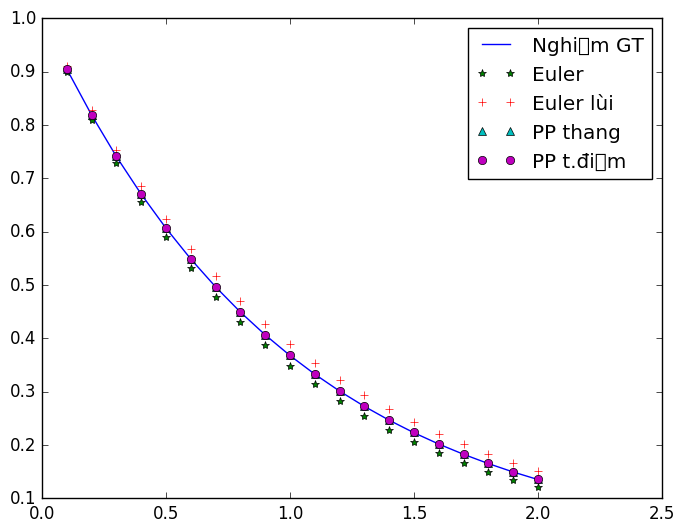

PyObject <matplotlib.legend.Legend object at 0x7fb01fe6f410>

In [11]:
using PyPlot 

f₁ = function(u,t) return -1*u end;
T₁, U₁ = euler(f₁, 1, 0, 0.1, 20);
T₁₁, U₁₁ = euler_lùi(f₁, 1, 0, 0.1, 20);
T₁₁₁, U₁₁₁ = pp_thang(f₁, 1, 0, 0.1, 20);
T₁₁₁₁, U₁₁₁₁ = pp_tr_điểm(f₁, 1, 0, 0.1, 20);

plot(T₁, 1*exp(-1*T₁), label="Nghiệm GT")
plot(T₁, U₁, linewidth = 0, marker="*", label="Euler")
plot(T₁₁, U₁₁, linewidth = 0, marker="+", label="Euler lùi")
plot(T₁₁₁, U₁₁₁, linewidth = 0, marker="^", label="PP thang")
plot(T₁₁₁₁, U₁₁₁₁, linewidth = 0, marker="o", label="PP t.điểm")

legend(loc="best")

Có thể thấy rõ phương pháp hình thang và PP trung điểm tốt hơn, cho kết quả sát hơn nghiệm giải tích 